In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.image import resize, grayscale_to_rgb
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import categorical_crossentropy

In [2]:
def preprocess_images(images, shape):
    images = images.astype('float32') / 255
    images = np.expand_dims(images, -1)
    images = resize(images, shape)
    images = grayscale_to_rgb(images)
    return images

In [3]:
dataset = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(dataset)

2

In [5]:
train_x, train_y = dataset[0]
test_x, test_y = dataset[1]

In [6]:
train_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

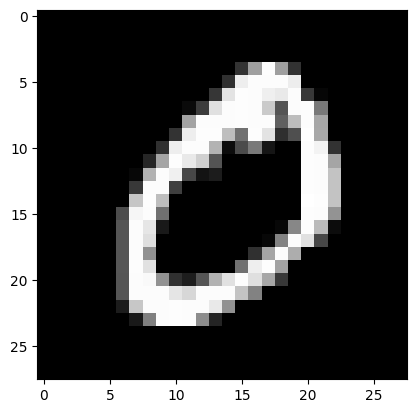

In [8]:
plt.imshow(train_x[1], cmap=plt.get_cmap('gray'))

In [9]:
train_y[1]

0

In [10]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (2, 2)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [13]:
train_x_new = preprocess_images(train_x, (100, 100))
test_x_new = preprocess_images(test_x, (100, 100))

In [14]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
train_y_new = to_categorical(train_y)
test_y_new = to_categorical(test_y)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                9

In [17]:
optimizer = Adam(learning_rate=0.001)

In [18]:
model.compile(optimizer=optimizer, loss=categorical_crossentropy)

In [19]:
model.fit(train_x_new, train_y_new, epochs=3, batch_size=16, verbose=1)

Epoch 1/3
3750/3750 [==============================] - 394s 105ms/step - loss: 0.2639
Epoch 2/3
3750/3750 [==============================] - 371s 99ms/step - loss: 0.1304
Epoch 3/3
3750/3750 [==============================] - 370s 99ms/step - loss: 0.1014


In [20]:
model.predict(test_x_new)

313/313 [==============================] - 26s 82ms/step


array([[7.18017290e-09, 1.23463436e-11, 2.13732365e-09, ...,
        9.99991715e-01, 1.77126580e-08, 1.62312949e-06],
       [1.61574781e-06, 5.35369452e-07, 9.99242783e-01, ...,
        6.32922143e-17, 1.23491418e-05, 1.08108379e-12],
       [1.59512808e-06, 9.99656677e-01, 8.67330982e-06, ...,
        1.77512502e-05, 8.70816984e-06, 1.32593655e-07],
       ...,
       [6.69516387e-11, 2.98730277e-11, 8.98132176e-12, ...,
        9.60430261e-05, 1.55850030e-05, 8.58286076e-05],
       [1.61007762e-07, 3.99529609e-09, 5.05490272e-09, ...,
        2.71163856e-07, 2.72439748e-01, 1.42255075e-07],
       [1.87628132e-07, 5.57430621e-14, 3.88850196e-07, ...,
        1.37064067e-11, 8.73581882e-08, 3.66177314e-12]], dtype=float32)

In [32]:
base_model = VGG16(include_top=False, weights='imagenet',
                   input_shape=(100, 100, 3))

In [33]:
base_model.trainable = False

In [34]:
output_layer = Flatten()(base_model.output)
output_layer = Dense(10, activation='softmax')(output_layer)

In [35]:
model2 = Model(inputs=base_model.input, outputs=output_layer)

In [36]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [42]:
optimizer = Adam(learning_rate=0.001)

In [43]:
model2.compile(optimizer=optimizer, loss=categorical_crossentropy)

In [44]:
model2.fit(train_x_new, train_y_new, epochs=3, batch_size=16, verbose=1)

Epoch 1/3
  11/3750 [..............................] - ETA: 1:47:55 - loss: 2.0372

KeyboardInterrupt: 

In [ ]:
model2.predict(test_x_new)